In [6]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir

font_size = 30
font_size_ticks = 25

np.set_printoptions(precision=5)

def process_name(x):
    x = x[14:]
    x = x[:-7]
    x = x.translate(str.maketrans('','','_1234567890'))
    return x[2:] + ", " + x[:2]

file_path = "./data/weather/hourly_precipitation_2015.npy"

# data_matrix contains precipitation data from 134 stations (each station is a column)
data_matrix = np.load(file_path)

print(data_matrix.shape) 
print(data_matrix[25:35,:10])

(8760, 134)
[[0.  1.  0.3 0.7 0.  0.2 1.  0.2 0.  0.4]
 [0.  0.4 0.2 0.3 0.  0.6 1.9 1.1 0.  0. ]
 [0.  0.6 0.  0.  0.  0.2 0.7 1.1 0.  0. ]
 [0.  0.2 0.  0.  0.  0.  0.4 0.2 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.7 0.  0.  0. ]
 [0.  0.  0.6 0.2 0.  0.  0.5 0.2 0.  0.7]
 [0.  0.  0.9 0.9 0.  0.  1.3 0.  0.  0.6]
 [0.  0.3 0.6 1.2 0.  0.4 1.9 0.  0.  0.2]
 [0.  0.  0.3 0.  0.  0.6 0.6 0.4 0.  0.6]
 [0.  0.  0.5 0.  0.  0.2 0.5 0.6 0.  0.3]]


In [7]:
# We select three stations to study, stations contains the corresponding indices in data_matrix
# 24: Bodega, CA
# 99: Coos Bay, OR
# 102: Riley, OR
stations = [24,99,102]

In [9]:
# Compute joint pmf of three Bernoulli random variables indicating whether it rains (1) or not (0)
# in Bodega, Coos Bay and Riley
def compute_joint_pmf(station_1,station_2,station_3,data_matrix):
    submatrix = data_matrix[:,[station_1,station_2,station_3]]
    total_count = 0.
    counts = np.zeros((2,2,2))
    for ind in range(submatrix.shape[0]):
        rain_1 = int(submatrix[ind,0] > 0.)
        rain_2 = int(submatrix[ind,1] > 0.)
        rain_3 = int(submatrix[ind,2] > 0.)
        total_count += 1
        counts[rain_1,rain_2,rain_3] += 1
    joint_pmf = counts/total_count
    return counts,joint_pmf

counts,joint_pmf = compute_joint_pmf(stations[0],stations[1],stations[2],data_matrix)
print(counts)
print(joint_pmf)

[[[7472.  186.]
  [ 814.   89.]]

 [[  88.   21.]
  [  75.   15.]]]
[[[0.85297 0.02123]
  [0.09292 0.01016]]

 [[0.01005 0.0024 ]
  [0.00856 0.00171]]]


[0.97728 0.02272]
[0.88664 0.11336]
[0.9645 0.0355]


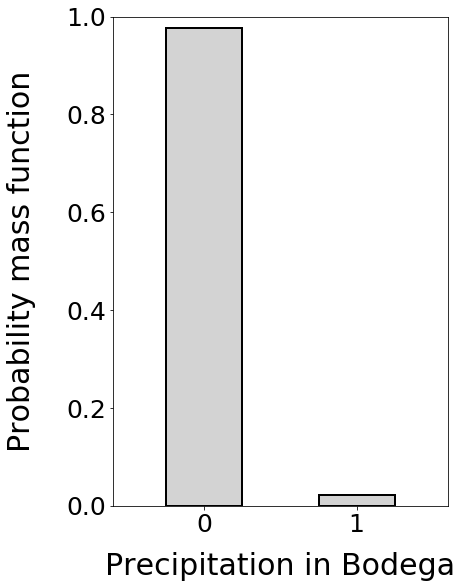

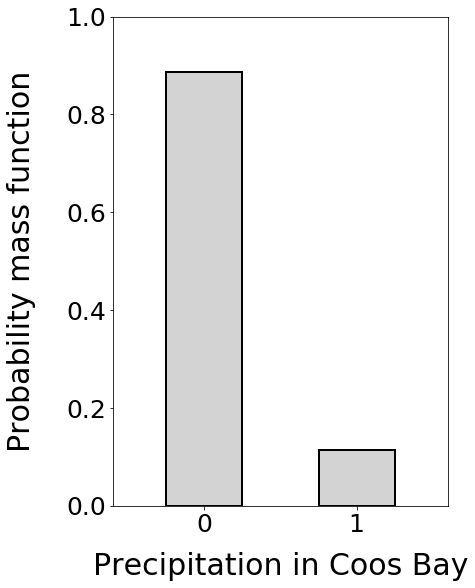

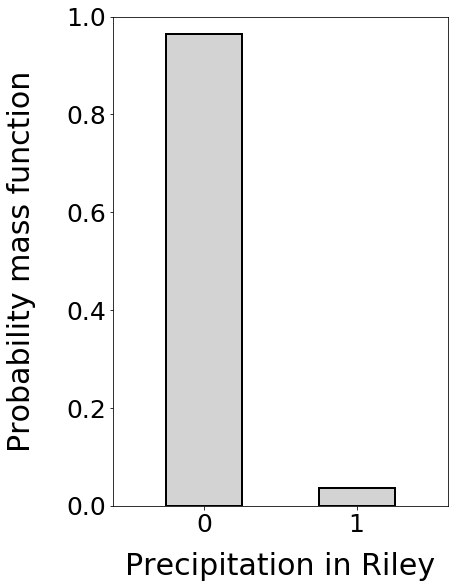

In [11]:
# Compute marginal pmf of each of the Bernoulli random variables 
def marginal_1_station(joint_pmf):
    marginal_pmf_1 = np.zeros(2)
    for ind_2 in range(2):
        for ind_3 in range(2):
            marginal_pmf_1 += joint_pmf[:,ind_2,ind_3]
    marginal_pmf_2 = np.zeros(2)
    for ind_1 in range(2):
        for ind_3 in range(2):
            marginal_pmf_2 += joint_pmf[ind_1,:,ind_3]
    marginal_pmf_3 = np.zeros(2)
    for ind_1 in range(2):
        for ind_2 in range(2):
            marginal_pmf_3 += joint_pmf[ind_1,ind_2,:]
    return marginal_pmf_1,marginal_pmf_2,marginal_pmf_3

marginal_pmf_1,marginal_pmf_2,marginal_pmf_3 = marginal_1_station(joint_pmf)
print(marginal_pmf_1)
print(marginal_pmf_2)
print(marginal_pmf_3)

vals = [0,1]
ymax = 1.0
xmin = -0.6
xmax = 1.6
plt.figure(figsize=(6,9))
plt.bar(vals,marginal_pmf_1, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Probability mass function",fontsize=font_size,labelpad = 30)
plt.xlabel("Precipitation in Bodega",fontsize=font_size,labelpad = 15)
plt.savefig('plots/precipitation_marginal_pmf_1.pdf',bbox_inches="tight")

plt.figure(figsize=(6,9))
plt.bar(vals,marginal_pmf_2, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Probability mass function",fontsize=font_size,labelpad = 30)
plt.xlabel("Precipitation in Coos Bay",fontsize=font_size,labelpad = 15)
plt.savefig('plots/precipitation_marginal_pmf_2.pdf',bbox_inches="tight")

plt.figure(figsize=(6,9))
plt.bar(vals,marginal_pmf_3, width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Probability mass function",fontsize=font_size,labelpad = 30)
plt.xlabel("Precipitation in Riley",fontsize=font_size,labelpad = 15)
plt.savefig('plots/precipitation_marginal_pmf_3.pdf',bbox_inches="tight")

In [12]:
# Compute marginal joint pmf of each pair of the Bernoulli random variables 
def marginal_2_stations(joint_pmf):
    marginal_pmf_12 = np.zeros((2,2))
    for ind_3 in range(2):
        marginal_pmf_12 += joint_pmf[:,:,ind_3]
    marginal_pmf_13 = np.zeros((2,2))
    for ind_2 in range(2):
        marginal_pmf_13 += joint_pmf[:,ind_2,:]
    marginal_pmf_23 = np.zeros((2,2))
    for ind_1 in range(2):
        marginal_pmf_23 += joint_pmf[ind_1,:,:]
    return marginal_pmf_12,marginal_pmf_13,marginal_pmf_23

marginal_pmf_12,marginal_pmf_13,marginal_pmf_23 = marginal_2_stations(joint_pmf)

print(marginal_pmf_12)
print(marginal_pmf_13)
print(marginal_pmf_23)

[[0.8742  0.10308]
 [0.01244 0.01027]]
[[0.94589 0.03139]
 [0.01861 0.00411]]
[[0.86301 0.02363]
 [0.10148 0.01187]]


[0.98836 0.01164]
[0.89855 0.10145]
[0.91564 0.08436]
[0.85577 0.14423]
[0.90176 0.09824]
[0.67636 0.32364]
[0.53988 0.46012]
[0.58333 0.41667]
[0.97571 0.02429]
[0.90144 0.09856]
[0.80734 0.19266]
[0.83333 0.16667]


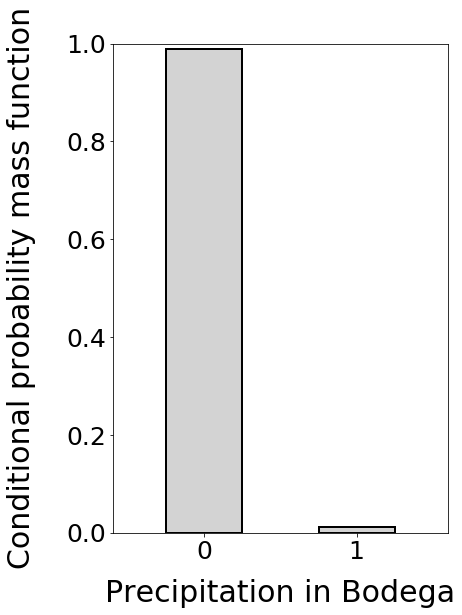

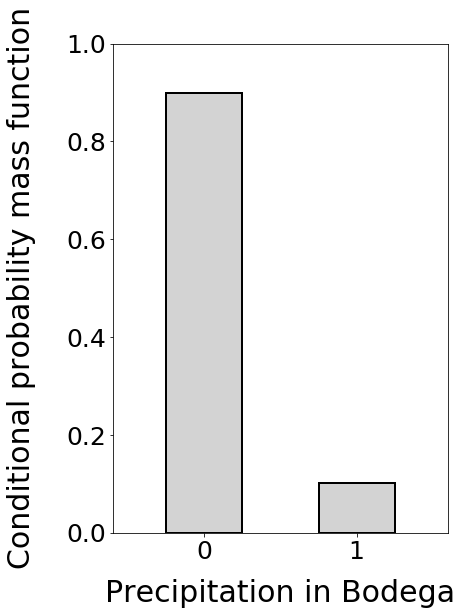

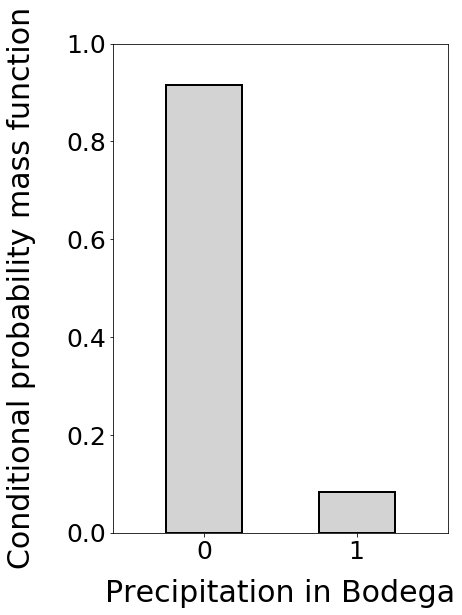

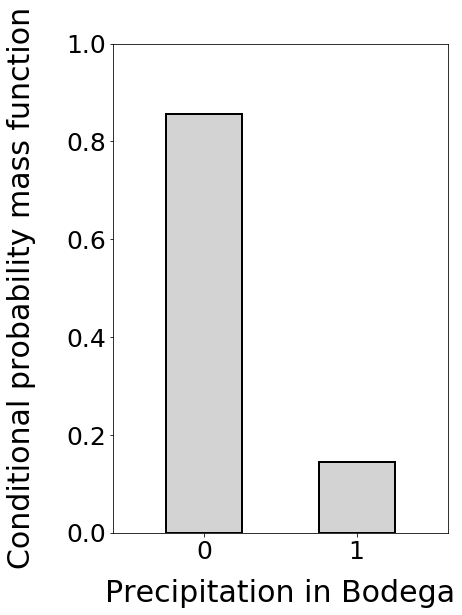

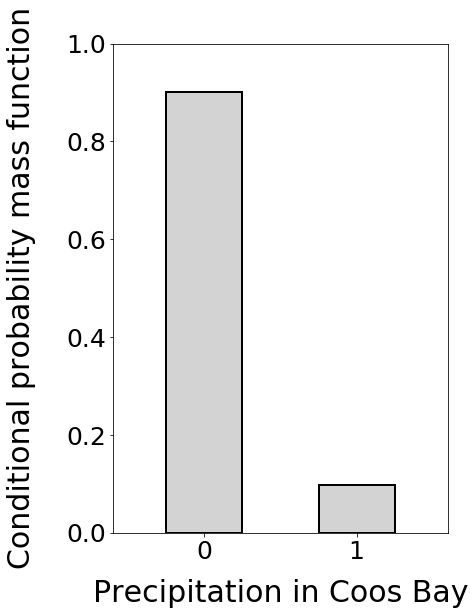

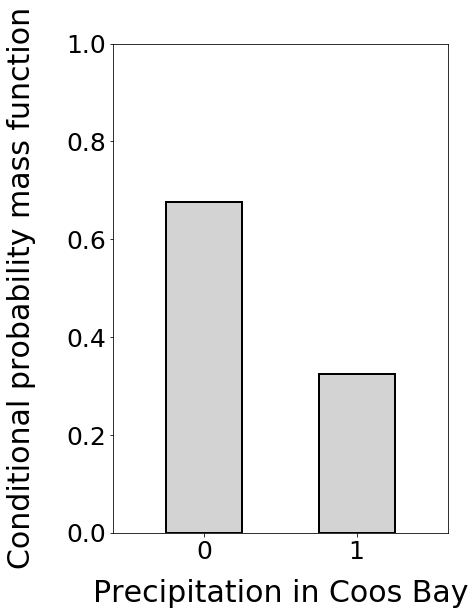

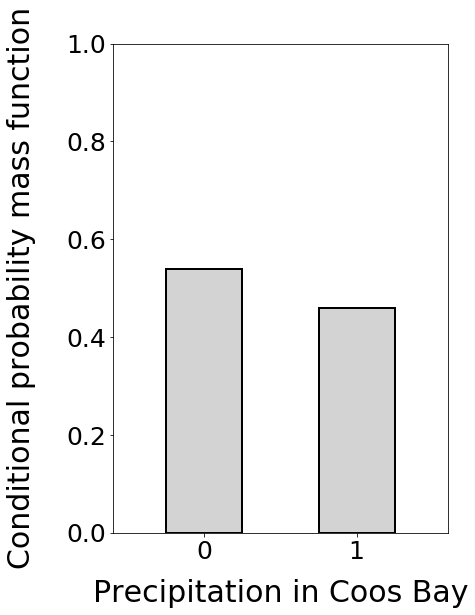

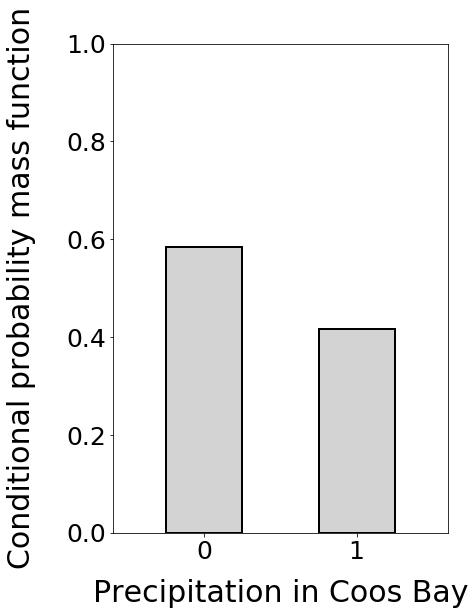

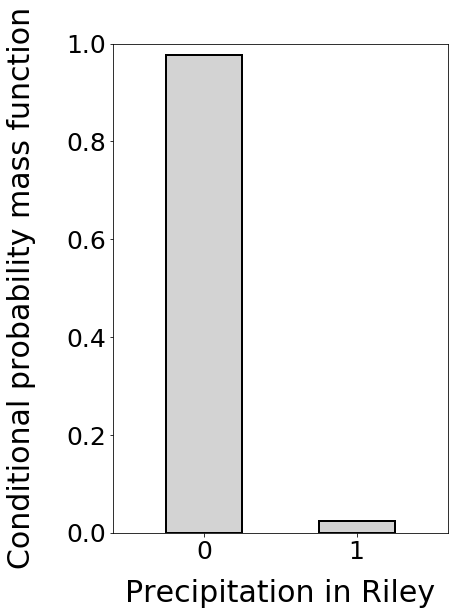

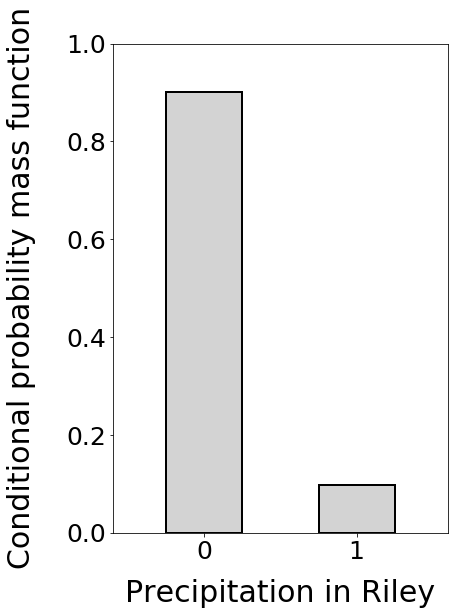

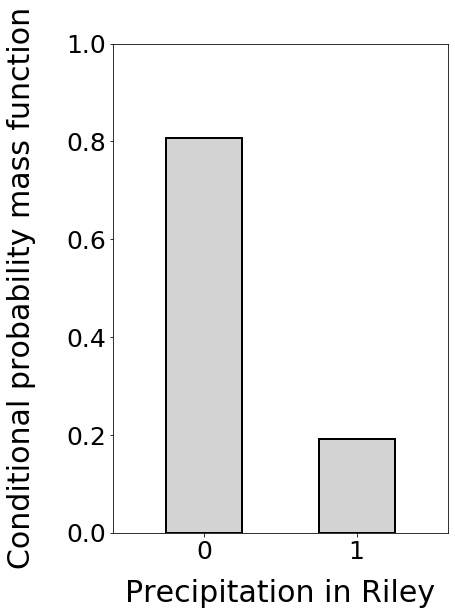

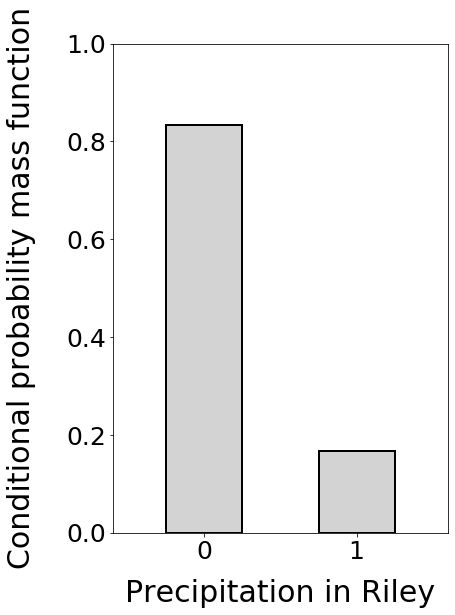

In [13]:
# Compute conditional pmf of each of the Bernoulli random variables given the other two 
def conditional_1_station_given_2(joint_pmf):
    cond_1_given_23 = np.zeros((2,2,2))
    for ind_2 in range(2):
        for ind_3 in range(2):
            cond_1_given_23[ind_2][ind_3] = joint_pmf[:,ind_2,ind_3] / np.sum(joint_pmf[:,ind_2,ind_3])
    cond_2_given_13 = np.zeros((2,2,2))
    for ind_1 in range(2):
        for ind_3 in range(2):
            cond_2_given_13[ind_1][ind_3] = joint_pmf[ind_1,:,ind_3] / np.sum(joint_pmf[ind_1,:,ind_3])
    cond_3_given_12 = np.zeros((2,2,2))
    for ind_1 in range(2):
        for ind_2 in range(2):
            cond_3_given_12[ind_1][ind_2] = joint_pmf[ind_1,ind_2,:] / np.sum(joint_pmf[ind_1,ind_2,:])        
    return cond_1_given_23,cond_2_given_13,cond_3_given_12

cond_1_given_23,cond_2_given_13,cond_3_given_12 = conditional_1_station_given_2(joint_pmf)

for ind_2 in range(2):
    for ind_3 in range(2):
        print(cond_1_given_23[ind_2][ind_3])
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_1_given_23[ind_2][ind_3], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Bodega",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_1_given_2eq'+str(ind_2)+'_3eq'+str(ind_3)+'.pdf',bbox_inches="tight")

for ind_1 in range(2):
    for ind_3 in range(2):
        print(cond_2_given_13[ind_1][ind_3])
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_2_given_13[ind_1][ind_3], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Coos Bay",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_2_given_1eq'+str(ind_1)+'_3eq'+str(ind_3)+'.pdf',bbox_inches="tight")

for ind_1 in range(2):
    for ind_2 in range(2):
        print(cond_3_given_12[ind_1][ind_2])
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_3_given_12[ind_1][ind_2], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Riley",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_3_given_1eq'+str(ind_1)+'_2eq'+str(ind_2)+'.pdf',bbox_inches="tight")


In [13]:
# Compute conditional joint pmf of each pair of the Bernoulli random variables given the other one
def conditional_2_stations_given_1(joint_pmf):
    cond_12_given_3 = np.zeros((2,2,2))
    for ind in range(2):
        cond_12_given_3[ind] = joint_pmf[:,:,ind] / np.sum(joint_pmf[:,:,ind],axis=None)
    cond_13_given_2 = np.zeros((2,2,2))
    for ind in range(2):
        cond_13_given_2[ind] = joint_pmf[:,ind,:] / np.sum(joint_pmf[:,ind,:],axis=None)
    cond_23_given_1 = np.zeros((2,2,2))
    for ind in range(2):
        cond_23_given_1[ind] = joint_pmf[ind,:,:] / np.sum(joint_pmf[ind,:,:],axis=None)
    return cond_12_given_3,cond_13_given_2,cond_23_given_1

cond_12_given_3,cond_13_given_2,cond_23_given_1 = conditional_2_stations_given_1(joint_pmf)

for ind in range(2):
    print(cond_12_given_3[ind])
for ind in range(2):
    print(cond_13_given_2[ind])
for ind in range(2):
    print(cond_23_given_1[ind])

Bodega, CA and CoosBay, OR conditioned on Riley, OR = 0
[[0.88437 0.09634]
 [0.01042 0.00888]]
Bodega, CA and CoosBay, OR conditioned on Riley, OR = 1
[[0.59807 0.28617]
 [0.06752 0.04823]]
Bodega, CA and Riley, OR conditioned on CoosBay, OR = 0
[[0.96202 0.02395]
 [0.01133 0.0027 ]]
Bodega, CA and Riley, OR conditioned on CoosBay, OR = 1
[[0.81974 0.08963]
 [0.07553 0.01511]]
CoosBay, OR and Riley, OR conditioned on Bodega, CA = 0
[[0.8728  0.02173]
 [0.09508 0.0104 ]]
CoosBay, OR and Riley, OR conditioned on Bodega, CA = 1
[[0.44221 0.10553]
 [0.37688 0.07538]]


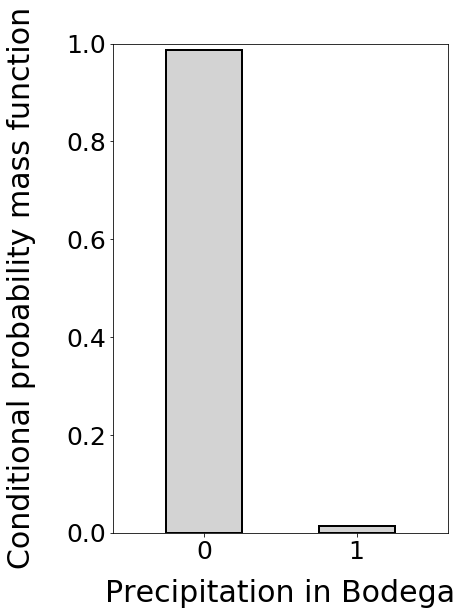

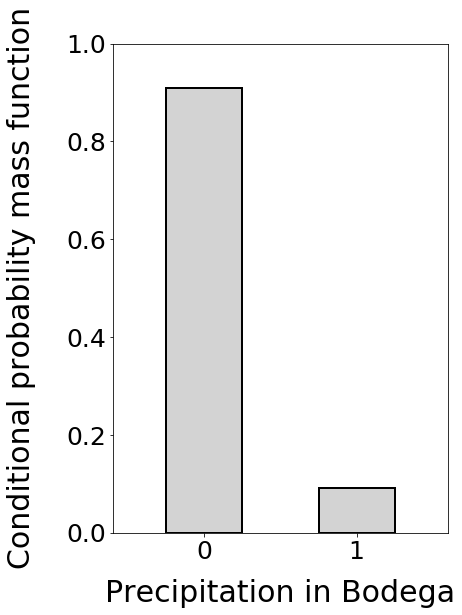

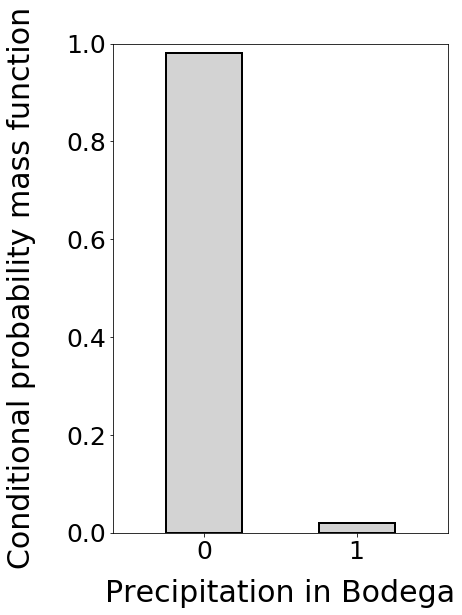

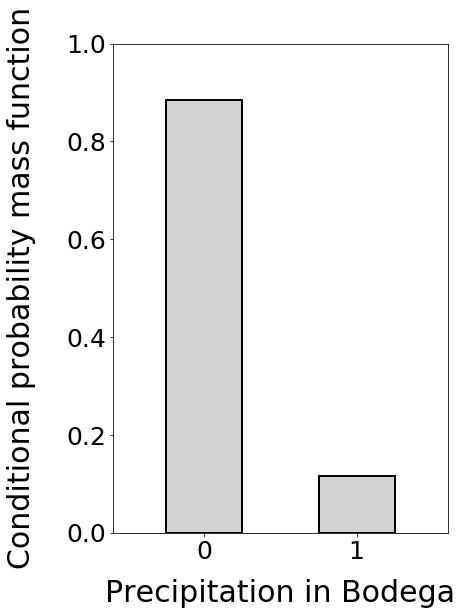

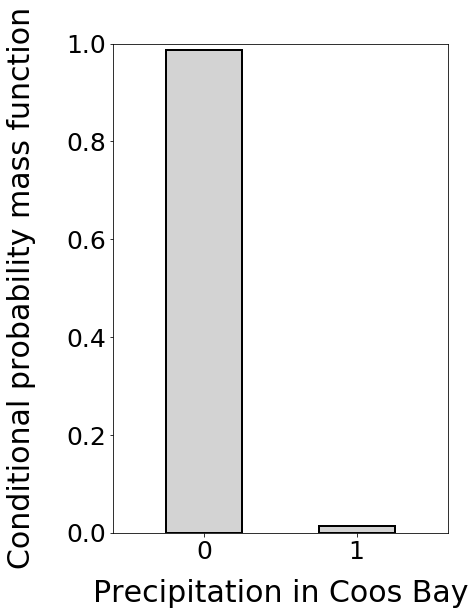

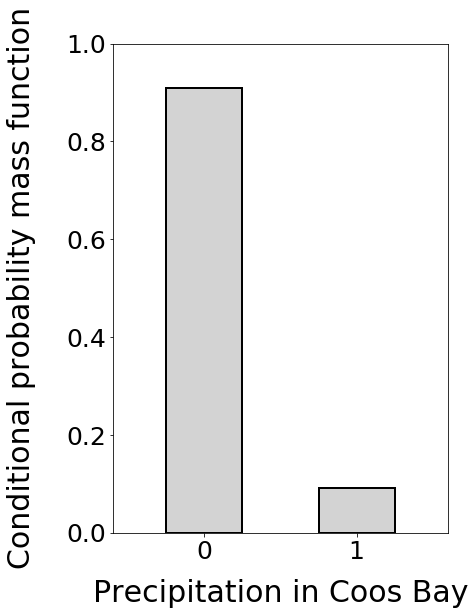

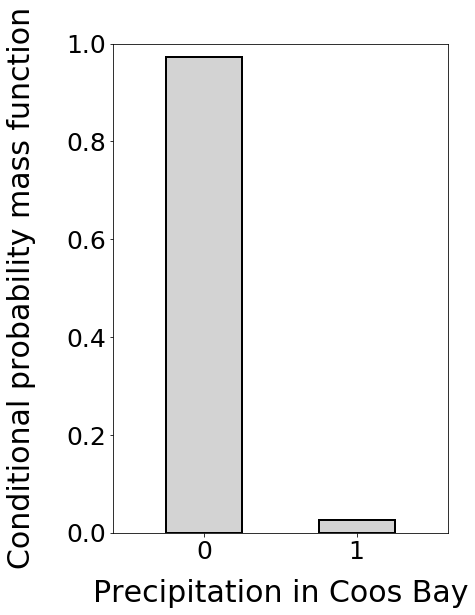

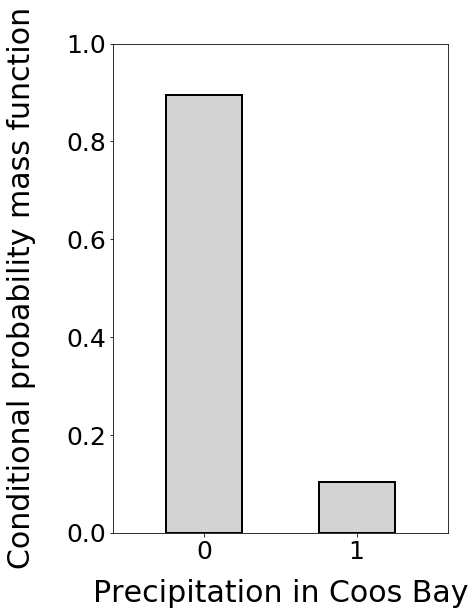

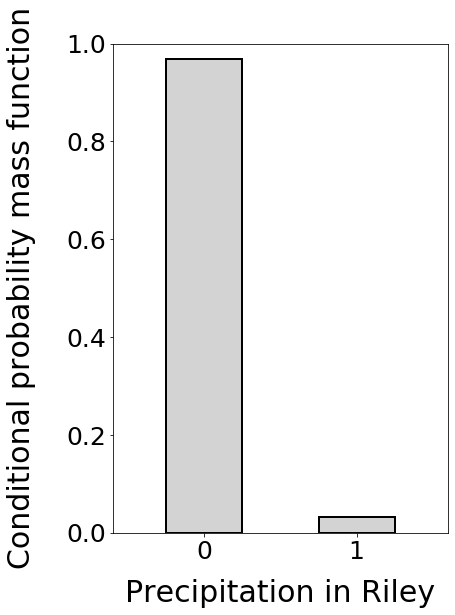

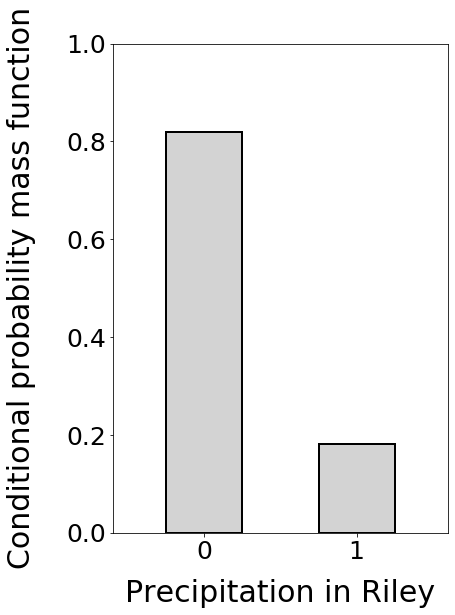

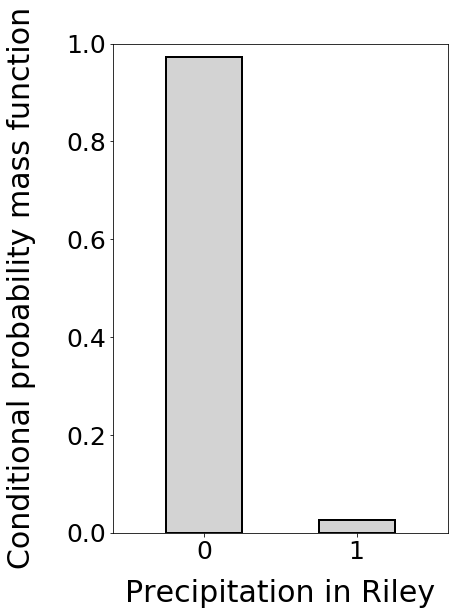

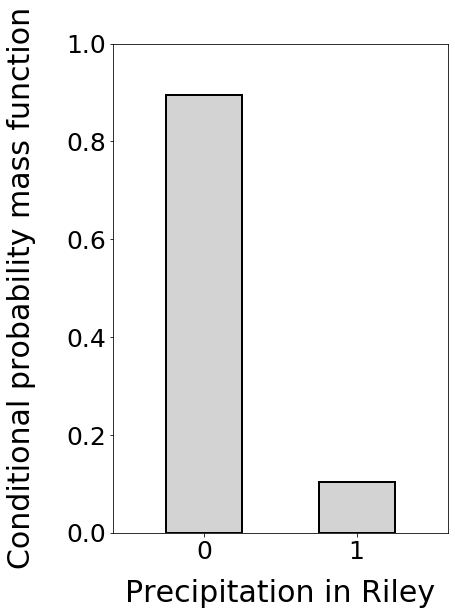

In [14]:
# Compute conditional pmf of each Bernoulli random variable given each of the other ones 
# (i.e. Bodega just conditioned on Coos Bay, Bodega just conditioned on Riley, etc.)
# Use a dictionary to save the conditional pmfs, for example cond_1["2"] should contain the conditional of the
# first random variable (Bodega) conditioned on the second (Coos Bay)
def conditional_1_station_given_1_station(joint_pmf):
    marginal_pmf_12,marginal_pmf_13,marginal_pmf_23 = marginal_2_stations(joint_pmf)
    
    cond_1 = {}
    cond_1["2"]=np.zeros((2,2))
    cond_1["2"][0] = marginal_pmf_12[:,0]/np.sum(marginal_pmf_12[:,0])
    cond_1["2"][1] = marginal_pmf_12[:,1]/np.sum(marginal_pmf_12[:,1])
    cond_1["3"]=np.zeros((2,2))
    cond_1["3"][0] = marginal_pmf_13[:,0]/np.sum(marginal_pmf_13[:,0])
    cond_1["3"][1] = marginal_pmf_13[:,1]/np.sum(marginal_pmf_13[:,1])
    
    cond_2 = {}
    cond_2["1"]=np.zeros((2,2))
    cond_2["1"][0] = marginal_pmf_12[:,0]/np.sum(marginal_pmf_12[:,0])
    cond_2["1"][1] = marginal_pmf_12[:,1]/np.sum(marginal_pmf_12[:,1])
    cond_2["3"]=np.zeros((2,2))
    cond_2["3"][0] = marginal_pmf_23[0,:]/np.sum(marginal_pmf_23[0,:])
    cond_2["3"][1] = marginal_pmf_23[1,:]/np.sum(marginal_pmf_23[1,:])
    
    cond_3 = {}
    cond_3["1"]=np.zeros((2,2))
    cond_3["1"][0] = marginal_pmf_13[0,:]/np.sum(marginal_pmf_13[0,:])
    cond_3["1"][1] = marginal_pmf_13[1,:]/np.sum(marginal_pmf_13[1,:])
    cond_3["2"]=np.zeros((2,2))
    cond_3["2"][0] = marginal_pmf_23[0,:]/np.sum(marginal_pmf_23[0,:])
    cond_3["2"][1] = marginal_pmf_23[1,:]/np.sum(marginal_pmf_23[1,:])
    
    return cond_1,cond_2,cond_3

cond_1,cond_2,cond_3 = conditional_1_station_given_1_station(joint_pmf)

for given in ["2","3"]:
    for ind in range(2):
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_1[given][ind], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Bodega",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_1_given_'+ given + 'eq'+str(ind)+'.pdf',bbox_inches="tight")
        
for given in ["1","3"]:
    for ind in range(2):
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_2[given][ind], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Coos Bay",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_2_given_'+ given + 'eq'+str(ind)+'.pdf',bbox_inches="tight")

for given in ["1","2"]:
    for ind in range(2):
        plt.figure(figsize=(6,9))
        plt.bar(vals,cond_3[given][ind], width = 0.5, color = "lightgray", edgecolor="black",linewidth = 2)
        plt.xticks(np.arange(0, 1+1, 1))
        plt.xticks(fontsize=font_size_ticks) 
        plt.yticks(fontsize=font_size_ticks)
        plt.ylim([0,ymax])
        plt.xlim([xmin,xmax])
        plt.ylabel("Conditional probability mass function",fontsize=font_size,labelpad = 30)
        plt.xlabel("Precipitation in Riley",fontsize=font_size,labelpad = 15)
        plt.savefig('plots/precipitation_cond_pmf_3_given_'+ given + 'eq'+str(ind)+'.pdf',bbox_inches="tight")
